In [6]:
from bbm92_cw.secure_key_rates import secure_key_rates
import numpy as np
import yaml
import matplotlib.pyplot as plt

# Instantaneously optimized params

total asymptotic secure key of 1.62e+04


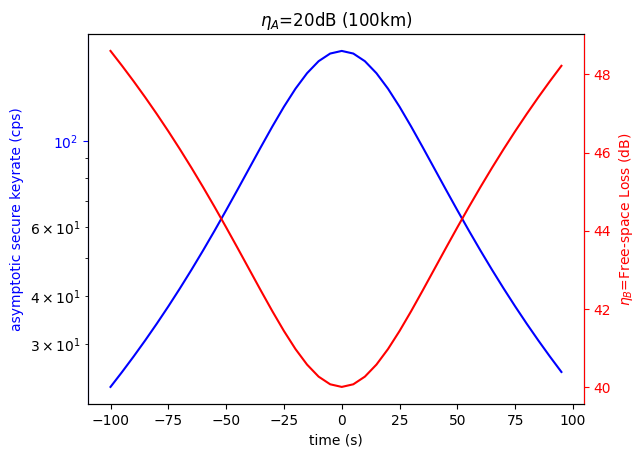

In [10]:
from bbm92_cw.secure_key_rates import secure_key_rates
import numpy as np
import yaml
import matplotlib.pyplot as plt

with open('settings.yml', 'r') as config_file:
    params = yaml.safe_load(config_file)
for key, value in params.items():
    globals()[key] = value

# Loss profile in an overpass, just example data
loss_terrestrial = 20  # dB 
time_step=5
time = np.arange(-100,100,step=time_step)
loss_free_space = -10*np.log10(1e-4/((time/40)**2+1)) # dB

# Loop through the loss evolution
rate_curve = []
for i,loss_free in enumerate(loss_free_space):
        link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
          DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB')
        tcc,B = link.optimal_params 
        rate = link.optimal_key_rate 
        rate_curve.append(rate)

integrated_key=sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step
print(f'total asymptotic secure key of {integrated_key:.2e}')

# plotting
fig,ax = plt.subplots()
ax.plot(time, rate_curve, label='asymptotic keyrate',c='blue')
ax.set_yscale('log')
ax.set_ylabel('asymptotic secure keyrate (cps)')
ax.set_xlabel('time (s)')
ax.set_title(rf'$\eta_A$=20dB (100km)')
ax2=ax.twinx()
ax2.plot(time, loss_free_space, c='r', label=r'$\eta_B$=Free-space Loss')
ax2.set_ylabel(r'$\eta_B$=Free-space Loss (dB)')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax.spines['left'].set_color('blue')
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')

# Fixed optimized params

total asymptotic secure key of 1.80519e+04
optimal brightness of 5.04496e+08 cps and coincidence window of 5.387e-11 s


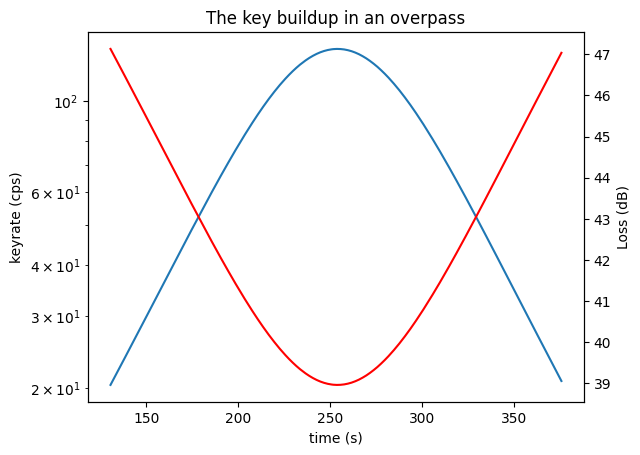

In [5]:
B_curve = []
tcc_curve = []
rate_curve = []

# optimize for azimuth
link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free_space[len(loss_free_space)//2], 
          DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB')
tcc,B = link.optimal_params

# calculate the AKR with these params
for i,loss_free in enumerate(loss_free_space):
        link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
          DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB',custom=True)
        rate = link.custom_performance([tcc,B])
        B_curve.append(B)
        tcc_curve.append(tcc)
        rate_curve.append(rate)

fig,ax = plt.subplots()
ax.plot(time, rate_curve, label='asymptotic keyrate')
ax.set_yscale('log')
ax.set_ylabel('keyrate (cps)')
ax.set_xlabel('time (s)')
ax.set_title(f'The key buildup in an overpass')

ax2=ax.twinx()
ax2.plot(time, loss_free_space, c='r', label='Loss')
ax2.set_ylabel('Loss (dB)')

print(f'total asymptotic secure key of {sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step:.5e}')
print(f'optimal brightness of {B:.5e} cps and coincidence window of {tcc:.3e} s')

# only opt tcc

total asymptotic secure key of 2.13227e+03


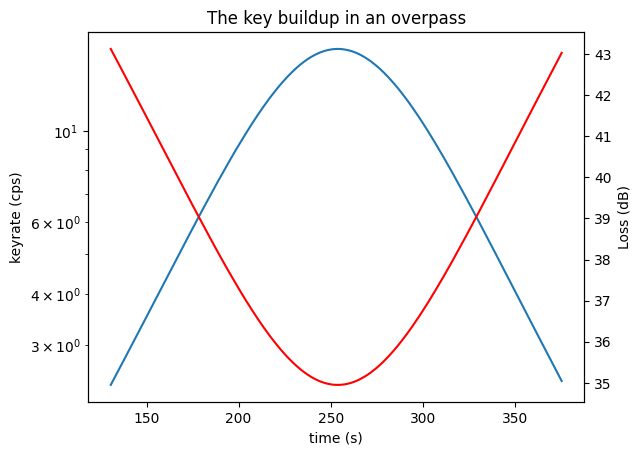

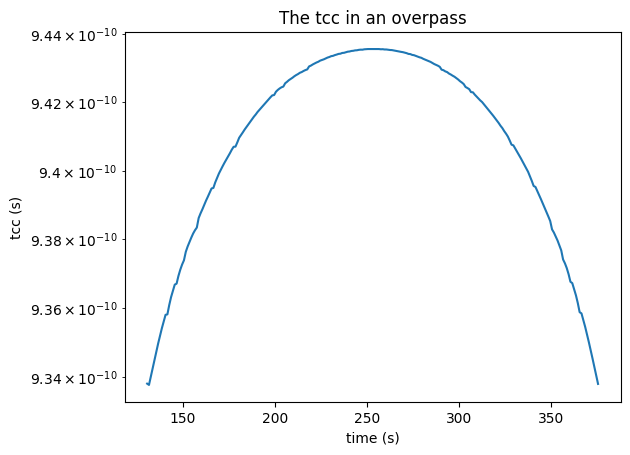

In [83]:
B_curve = []
tcc_curve = []
rate_curve = []

# optimize for azimuth
B = 6e6 

# calculate the AKR with these params
for i,loss_free in enumerate(loss_free_space):
        link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
          DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB',custom=True)
        tcc,rate = link.optimize_tcc_given_B(B)
        B_curve.append(B)
        tcc_curve.append(tcc)
        rate_curve.append(rate)

fig,ax = plt.subplots()
ax.plot(time, rate_curve, label='asymptotic keyrate')
ax.set_yscale('log')
ax.set_ylabel('keyrate (cps)')
ax.set_xlabel('time (s)')
ax.set_title(f'The key buildup in an overpass')

ax2=ax.twinx()
ax2.plot(time, loss_free_space, c='r', label='Loss')
ax2.set_ylabel('Loss (dB)')

fig,ax = plt.subplots()
ax.plot(time, tcc_curve, label='tcc')
ax.set_yscale('log')
ax.set_ylabel('tcc (s)')
ax.set_xlabel('time (s)')
ax.set_title(f'The tcc in an overpass')


print(f'total asymptotic secure key of {sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step:.5e}')
#print(f'brightness of {B:.5e} cps and coincidence window of {tcc:.3e} s')

# trace the size as function of brightness

Text(0.5, 1.0, 'size dep on B')

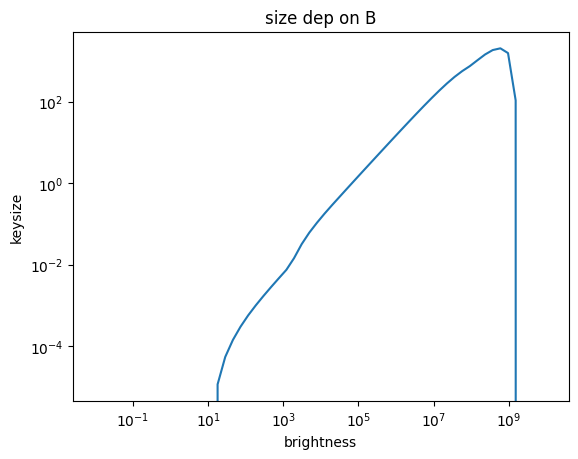

In [7]:


# optimize for azimuth
rates=[]
Bs = np.logspace(-2,10,60)
for B in Bs:
    B_curve = []
    tcc_curve = []
    rate_curve = []
    # calculate the AKR with these params
    for i,loss_free in enumerate(loss_free_space):
            link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
            DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB',custom=True)
            tcc,rate = link.optimize_tcc_given_B(B)
            B_curve.append(B)
            tcc_curve.append(tcc)
            rate_curve.append(rate)
    #print(sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step)
    rates.append(sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step)
    
    
    # fig,ax = plt.subplots()
    # ax.plot(time, rate_curve, label='asymptotic keyrate')
    # ax.set_yscale('log')
    # ax.set_ylabel('keyrate (cps)')
    # ax.set_xlabel('time (s)')
    # ax.set_title(f'The key buildup in an overpass')

    # ax2=ax.twinx()
    # ax2.plot(time, loss_free_space, c='r', label='Loss')
    # ax2.set_ylabel('Loss (dB)')

    # fig,ax = plt.subplots()
    # ax.plot(time, tcc_curve, label='tcc')
    # ax.set_yscale('log')
    # ax.set_ylabel('tcc (s)')
    # ax.set_xlabel('time (s)')
    # ax.set_title(f'The tcc in an overpass')

fig,ax = plt.subplots()
ax.plot(Bs, rates, label='asymptotic keyrate')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('keysize')
ax.set_xlabel('brightness')
ax.set_title(f'size dep on B')

# trace optimal rate as function of terrestrial loss

Text(0.5, 1.0, 'keysize dep on terrestrial arm')

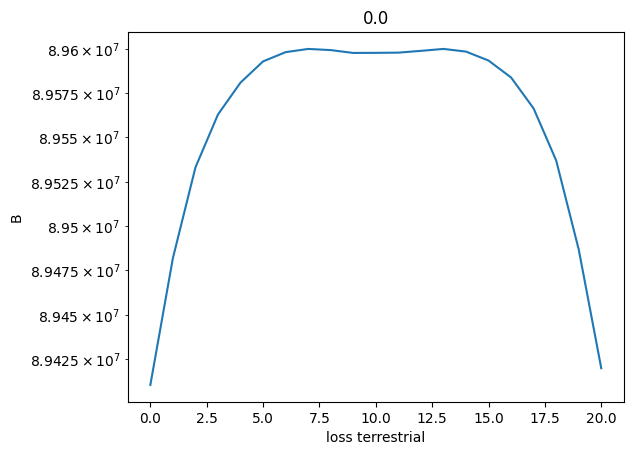

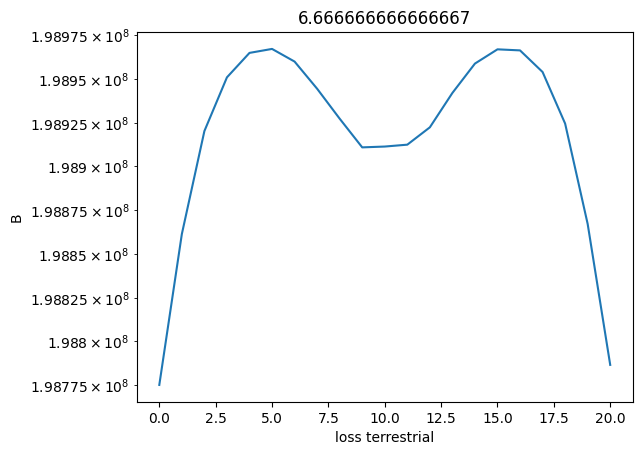

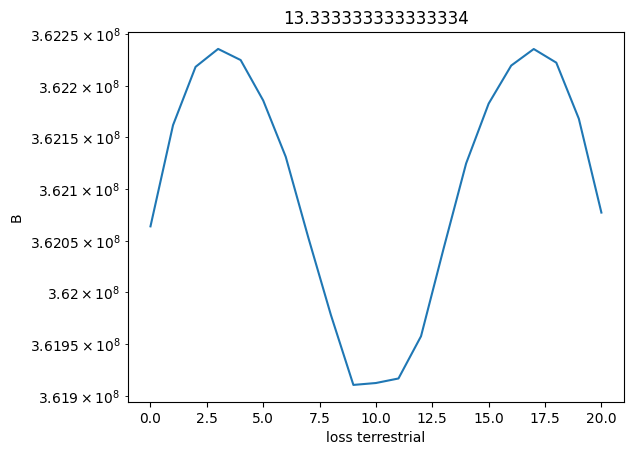

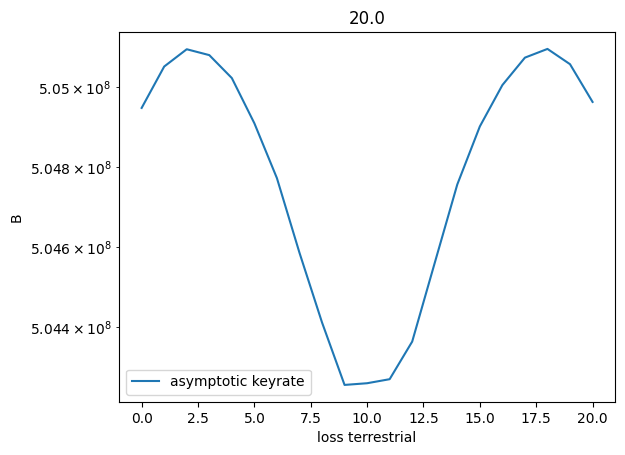

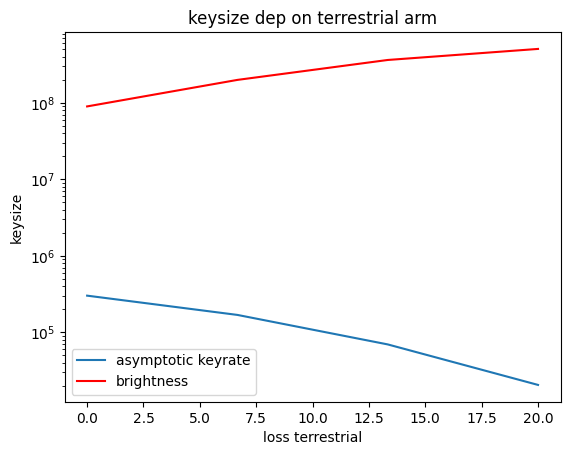

In [17]:
b_maxs = []

# optimize for azimuth
rates=[]

loss_terr = np.linspace(0,20,4)
loss_free = 40
for loss_terrestrial in loss_terr:
    B_curve = []
    tcc_curve = []
    rate_curve = []
    # calculate the AKR with these params
    for i,loss_free in enumerate(loss_free_space):
            link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
            DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB')
            tcc,B = link.optimal_params 
            rate = link.optimal_key_rate #link.custom_performance([1e-12,1e9])
            B_curve.append(B)
            tcc_curve.append(tcc)
            rate_curve.append(rate)
    b_maxs.append(max(B_curve))
    #print(sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step)
    rates.append(sum([rate_curve[i] if rate_curve[i]>0 else 0 for i in range(len(rate_curve))])*time_step)
    
    
    fig,ax = plt.subplots()
    ax.plot( B_curve, label='asymptotic keyrate')
    #ax.plot( rate_curve, label='asymptotic keyrate')
    ax.set_yscale('log')
    ax.set_ylabel('B')
    #ax.set_ylim(1,1e8)
    ax.set_xlabel('loss terrestrial')
    ax.set_title(f'{loss_terrestrial}')
ax.legend()
fig,ax = plt.subplots()
ax.plot(loss_terr, rates, label='asymptotic keyrate')

ax.plot(loss_terr, b_maxs, label='brightness',c='red')
ax.legend()
ax.set_yscale('log')
ax.set_ylabel('keysize')
ax.set_xlabel('loss terrestrial')
ax.set_title(f'keysize dep on terrestrial arm')



# Brightness per loss

/var/folders/77/64d2ln8x77zfgqvkvjzqsnrr0000gn/T/ipykernel_54797/650970599.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


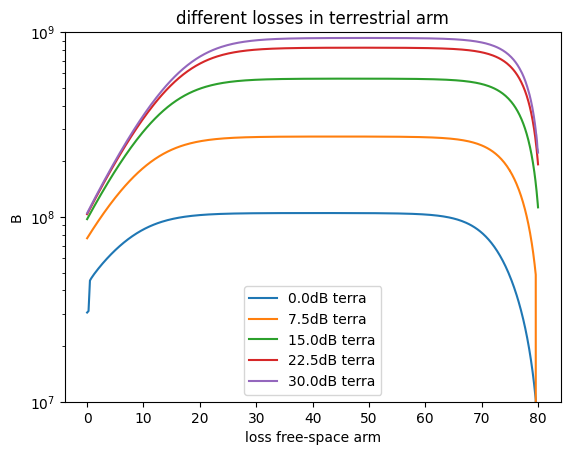

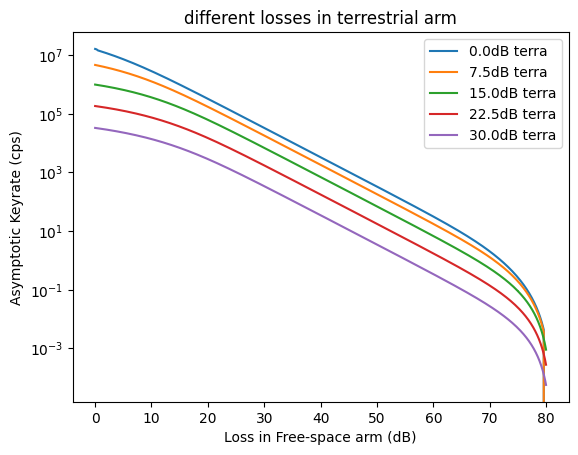

In [5]:
b_maxs = []

# optimize for azimuth


fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
B0=1e6

loss_frees = np.linspace(0,75,300)
loss_frees = np.concatenate([loss_frees,np.linspace(75,80,100)])
for loss_terrestrial in np.linspace(0,30,5):
    B_curve = []
    tcc_curve = []
    rate_curve = []
    for i,loss_free in enumerate(loss_frees):
        link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
        DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB',B0=B0)
        tcc,B = link.optimal_params 
        rate = link.optimal_key_rate #link.custom_performance([1e-12,1e9])
        B_curve.append(B)
        B0=B/1e9
        tcc_curve.append(tcc)
        rate_curve.append(rate)
        
    ax.plot(loss_frees, B_curve, label=f'{loss_terrestrial}dB terra')
    ax2.plot(loss_frees, rate_curve, label=f'{loss_terrestrial}dB terra')

ax.legend()
ax.set_yscale('log')
ax.set_ylabel('B')
ax.set_ylim(1e7,1e9)
ax.set_xlabel('loss free-space arm')
ax.set_title(f'different losses in terrestrial arm')
#fig.show()

ax2.legend()
ax2.set_yscale('log')
ax2.set_ylabel('Asymptotic Keyrate (cps)')
#ax2.set_ylim(1e7,1e9)
ax2.set_xlabel('Loss in Free-space arm (dB)')
ax2.set_title(f'different losses in terrestrial arm')
fig2.show()



# experimentally reproducible

Text(0.5, 1.0, 'different losses in terrestrial arm')

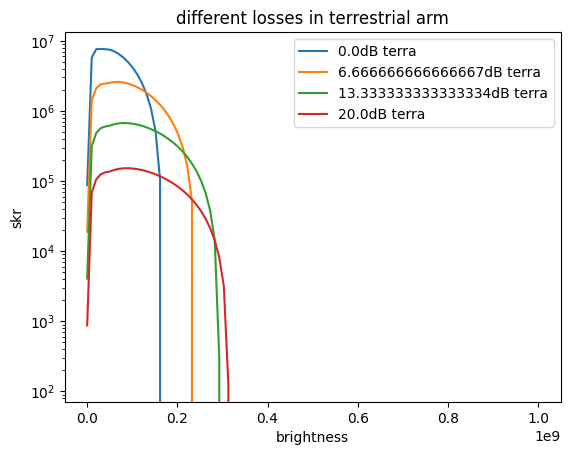

In [92]:
b_maxs = []
fig,ax = plt.subplots()

loss_free = 0
DC_A = np.array([800,900])
DC_B = np.array([44000,17000])
loss_terrestrials = np.linspace(0,20,4)
for loss_terrestrial in loss_terrestrials:
        B_curve =  np.linspace(1e5,1e9,100)
        tcc_curve = []
        rate_curve = []
        for B in B_curve:
                link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
                DC_A=DC_A, DC_B=DC_B, e_b=bit_error, e_p=phase_error, f=f, t_dead=dead_times, loss_format='dB',custom=True)
                tcc,rate = link.optimize_tcc_given_B( B)
                tcc_curve.append(tcc)
                rate_curve.append(rate)
                
        ax.plot( B_curve, rate_curve, label=f'{loss_terrestrial}dB terra')


ax.legend()
ax.set_yscale('log')
ax.set_ylabel('skr')
#ax.set_ylim(1e7,1e9)
ax.set_xlabel('brightness')
ax.set_title(f'different losses in terrestrial arm')



# error rate dependence on e_bit = e_phase

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/77/64d2ln8x77zfgqvkvjzqsnrr0000gn/T/ipykernel_54797/2679056775.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/77/64d2ln8x77zfgqvkvjzqsnrr0000gn/T/ipykernel_54797/2679056775.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


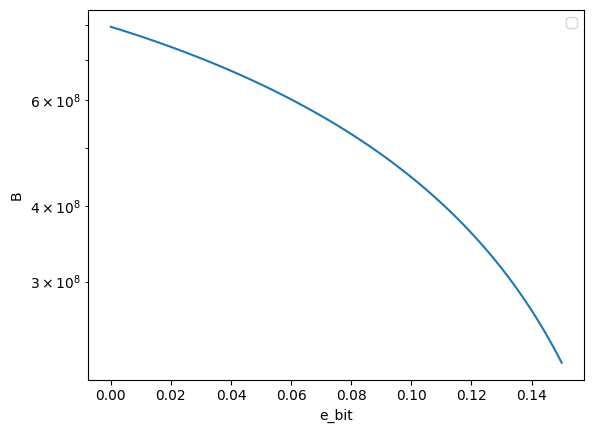

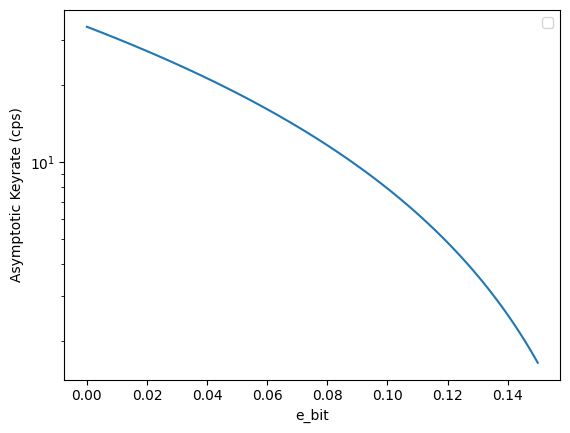

In [13]:
b_maxs = []

# optimize for azimuth


fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
B0=1e6

loss_free=50
loss_terrestrial=20
b_errors=np.linspace(0,0.15,100)
B_curve = []
tcc_curve = []
rate_curve = []
for i,be in enumerate(b_errors):
    link = secure_key_rates(name=f'sat overpass link', d=d, t_delta=jitters, eff_A=loss_terrestrial, eff_B=loss_free, 
    DC_A=darkcounts_OGS, DC_B=darkcounts_SAT, e_b=be, e_p=be, f=f, t_dead=dead_times, loss_format='dB',B0=B0)
    tcc,B = link.optimal_params 
    rate = link.optimal_key_rate #link.custom_performance([1e-12,1e9])
    B_curve.append(B)
    B0=B/1e9
    tcc_curve.append(tcc)
    rate_curve.append(rate)
   
ax.plot(b_errors,B_curve)
ax.legend()
ax.set_yscale('log')
ax.set_ylabel('B')
#ax.set_ylim(1e7,1e9)
ax.set_xlabel('e_bit')
#ax.set_title(f'different losses in terrestrial arm')
fig.show()

ax2.plot(b_errors,rate_curve)
ax2.legend()
ax2.set_yscale('log')
ax2.set_ylabel('Asymptotic Keyrate (cps)')
#ax2.set_ylim(1e7,1e9)
ax2.set_xlabel('e_bit')
#ax2.set_title(f'different losses in terrestrial arm')
fig2.show()



In [73]:
f = open('/Users/thomasjaeken/Desktop/school/PhD/cameron_simulations/QKD_Sat_Link/orbit modelling resources/orbit LLAT files/600kmHOGSLLAT.txt','r')
lines=f.readlines()
data = [np.float_( lines[i][:-1].split(',')) for i in range(len(lines))]
f.close()
f = open('/Users/thomasjaeken/Desktop/school/PhD/cameron_simulations/QKD_Sat_Link/orbit modelling resources/orbit LLAT files/600kmHOGSLLAT_processed.txt','w')
data_out = []
for line in data:
    if line[1] >=180:
        line[1] -= 360
    data_out.append( str(line[0])+','+str(line[1])+','+str(line[2])+','+str(line[3])+'\n' )
f.writelines(data_out)
f.close()